# Task a) and b) of Project 1 - FYS-STK4155

In [25]:
from functions import *

%load_ext autoreload
%autoreload 2

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 10,
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# a) Ordinary Least Squares (OLS)
* Using OLS to predict the Runge function.
* Method is applied for the different number of data points in `n_vals` and for the different polynomial degrees in `p_vals`.
* Model performance assessed with MSE score and R^2 score.

In [26]:
n = 2000  # samples
p_vals = np.arange(2, 16)  # polynomial degrees

In [27]:
df_OLS_degs = OLS_various_poly_deg(n, p_vals)  # Dataframe with results for n samples and range of poly degrees

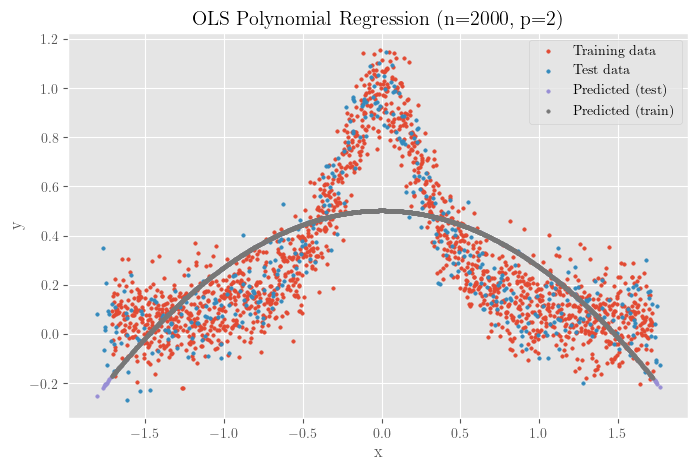

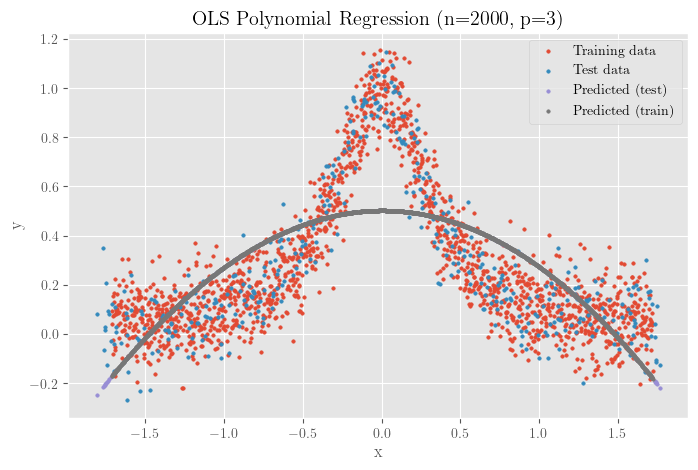

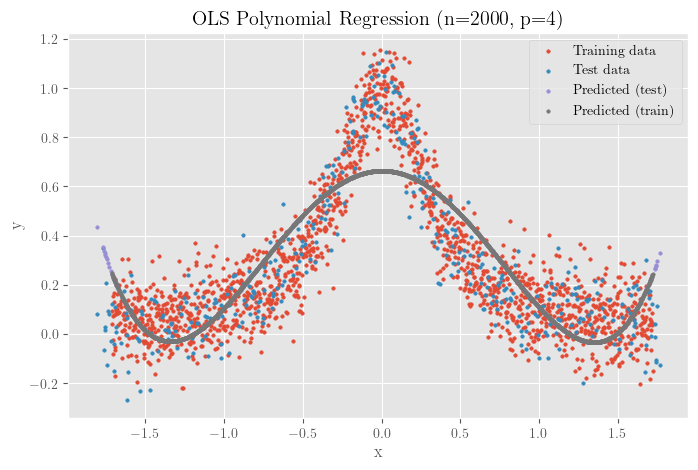

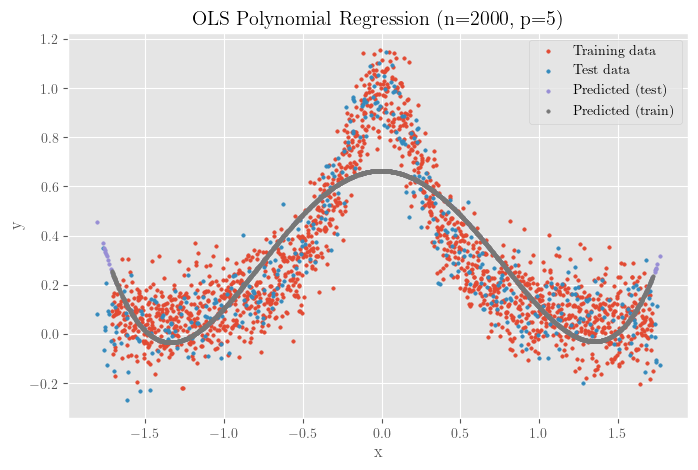

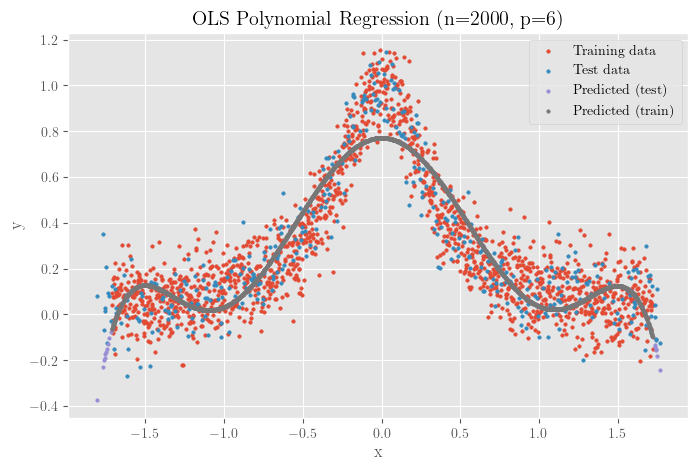

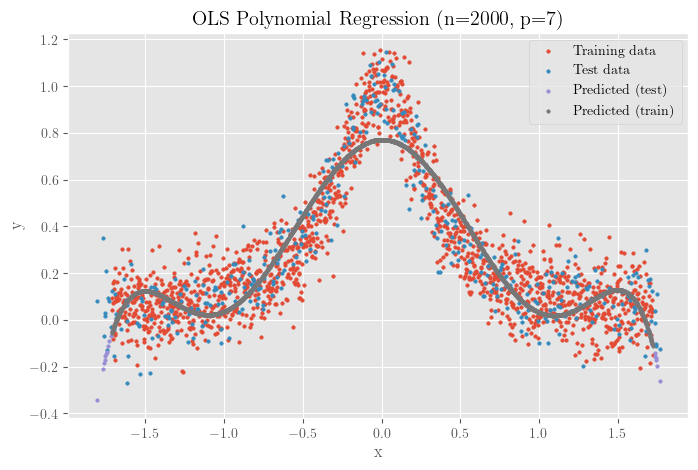

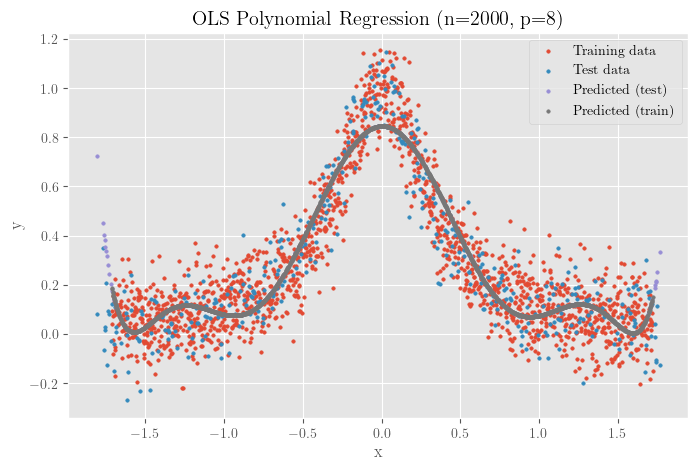

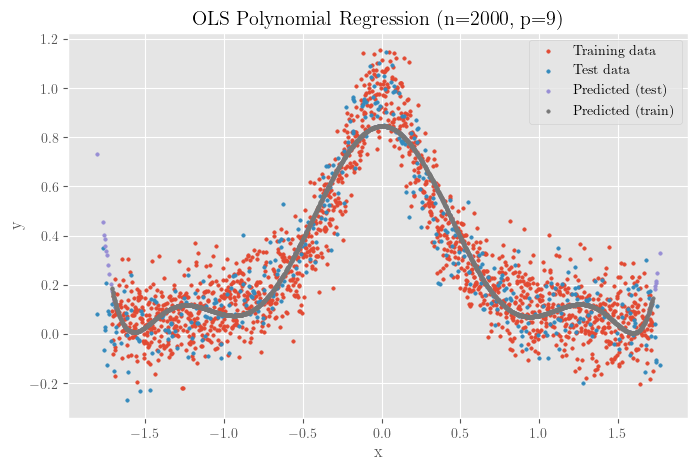

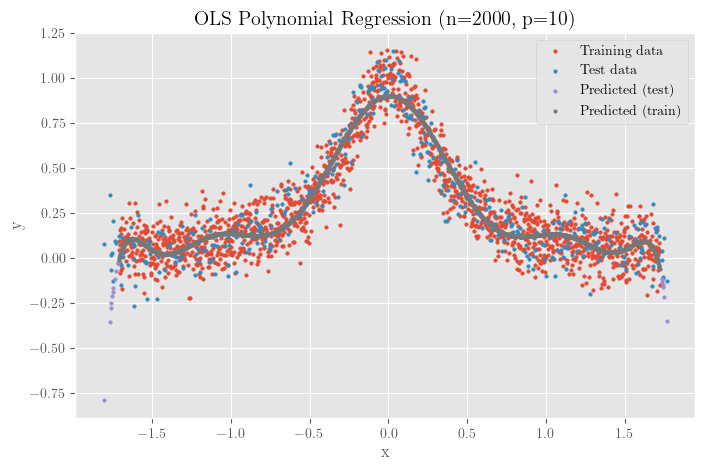

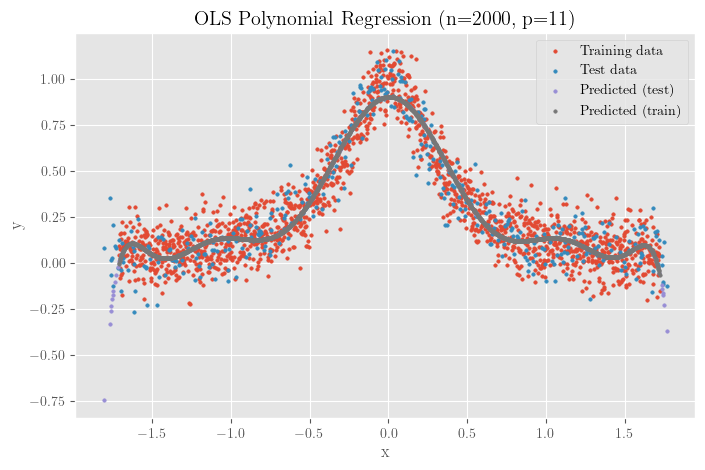

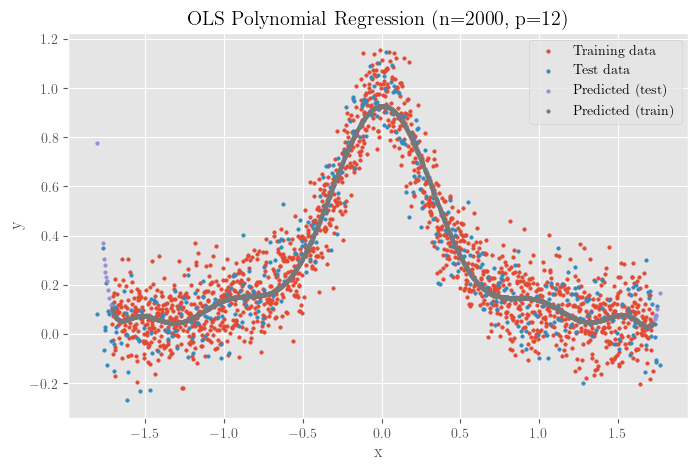

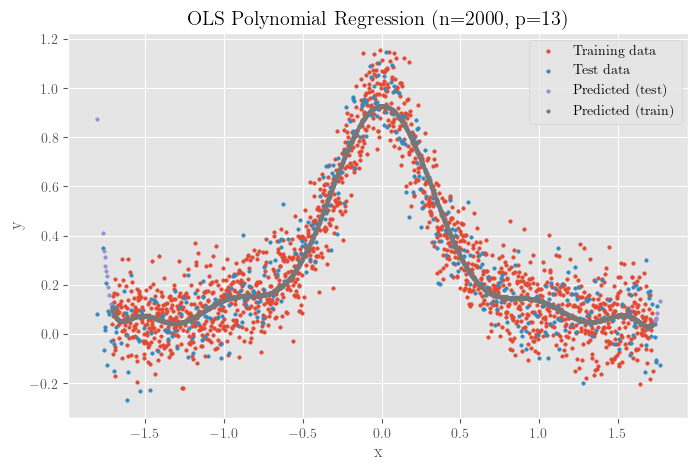

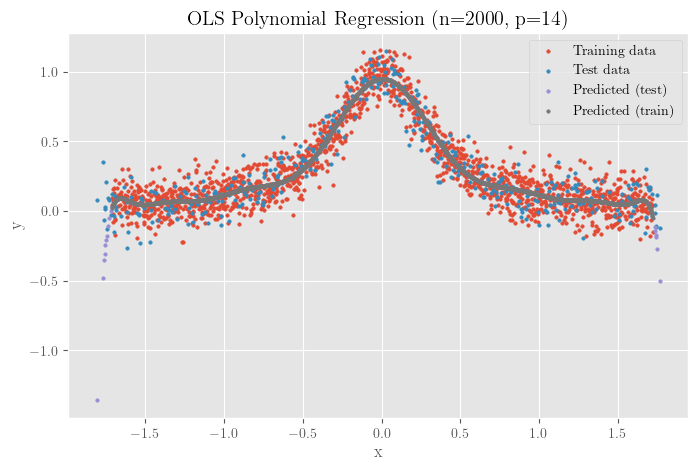

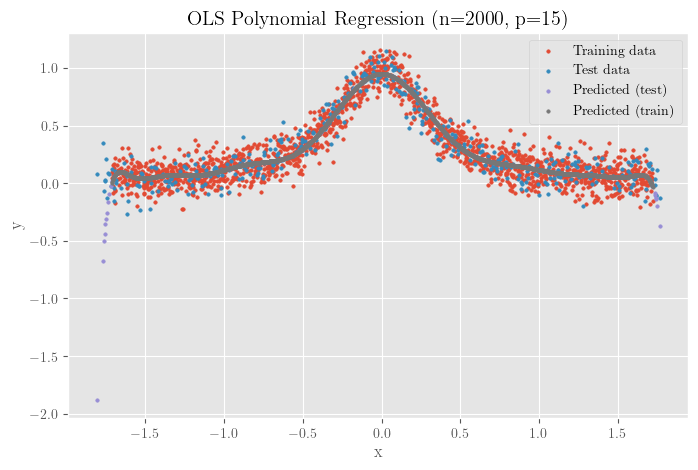

In [28]:
for p in p_vals:
    plot_OLS_results(df_OLS_degs, p, n)

Text(0.5, 0.98, 'OLS (n=2000)')

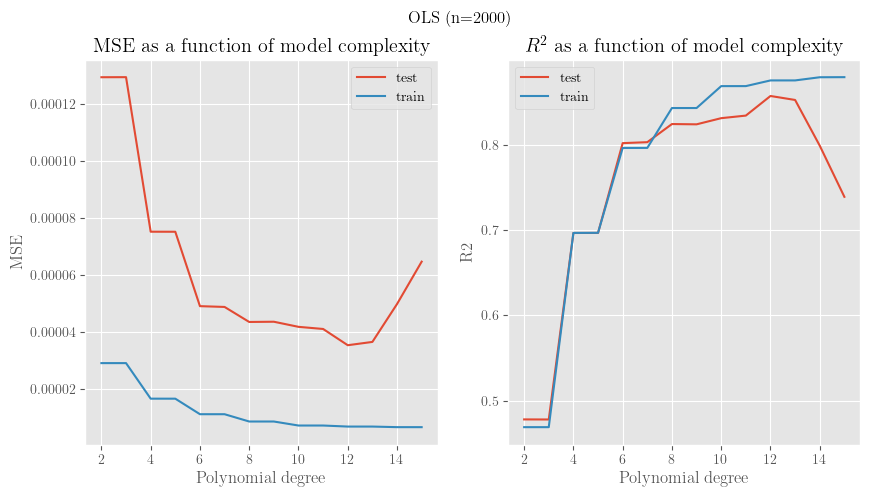

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_test'], label='test')
ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_train'], label='train')

ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_test'], label='test')
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_train'], label='train')

ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')

ax[0].set_title('MSE as a function of model complexity')
ax[1].set_title(r'$R^2$ as a function of model complexity')

for axs in ax:
    axs.legend()
    axs.set_xlabel('Polynomial degree')

fig.suptitle(f'OLS (n={n})')

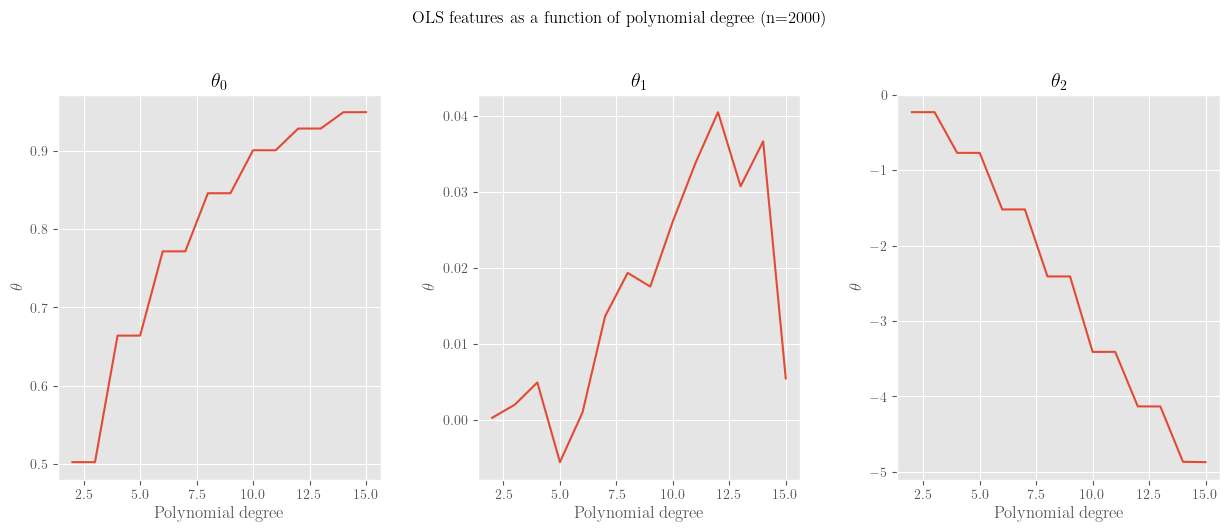

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[0]))
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[1]))
ax[2].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[2]))

ax[0].set_title(r'$\theta_0$')
ax[1].set_title(r'$\theta_1$')
ax[2].set_title(r'$\theta_2$')

fig.suptitle(f'OLS features as a function of polynomial degree (n={n})', y=1.05)

for axs in ax:
    axs.set_xlabel('Polynomial degree')
    axs.set_ylabel(r'$\theta$')

In [31]:
p = 13  # Polynomial degree
n_vals = np.arange(10, 2000, 1)  # samples

In [32]:
df_OLS_points = OLS_various_n_data(p, n_vals)  # Dataframe with results for one poly degree and for different number of samples

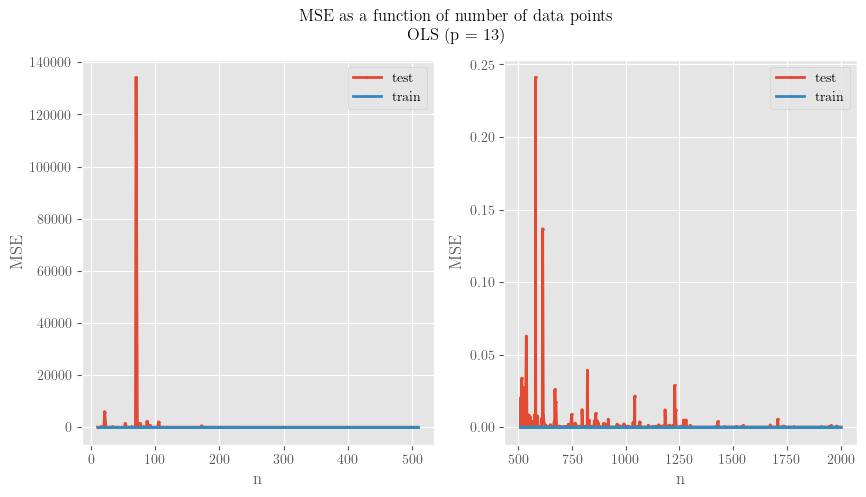

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_OLS_points['n'].iloc[:500], df_OLS_points['MSE_test'].iloc[:500], marker='o', markersize='1', linewidth='2', label='test')
ax[0].plot(df_OLS_points['n'].iloc[:500], df_OLS_points['MSE_train'].iloc[:500], marker='o', markersize='1', linewidth='2', label='train')

ax[1].plot(df_OLS_points['n'].iloc[500:], df_OLS_points['MSE_test'].iloc[500:], marker='o', markersize='1', linewidth='2', label='test')
ax[1].plot(df_OLS_points['n'].iloc[500:], df_OLS_points['MSE_train'].iloc[500:], marker='o', markersize='1', linewidth='2', label='train')

fig.suptitle(f'MSE as a function of number of data points \n OLS (p = {p})')

for axs in ax.flatten():
    axs.legend()
    axs.set_ylabel('MSE')
    axs.set_xlabel('n')

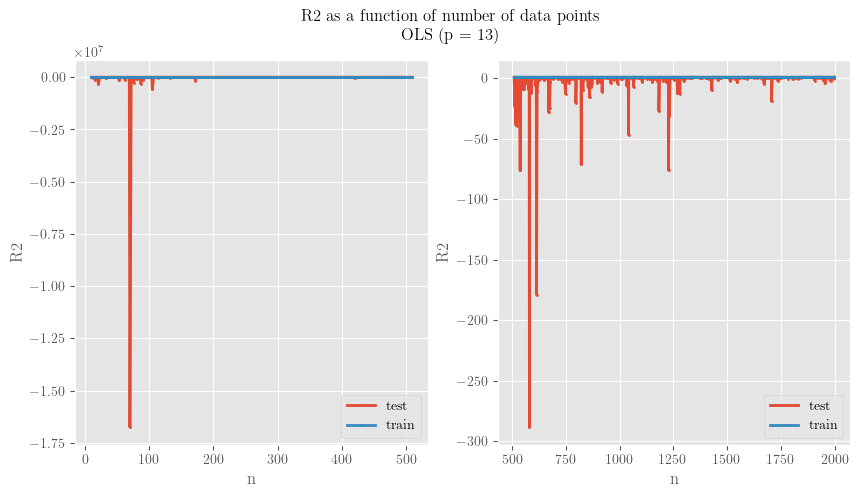

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#ax[1].set_ylim(-0.2, 1)

ax[0].plot(df_OLS_points['n'].iloc[:500], df_OLS_points['R2_test'].iloc[:500], marker='o', markersize='1', linewidth='2', label='test')
ax[0].plot(df_OLS_points['n'].iloc[:500], df_OLS_points['R2_train'].iloc[:500], marker='o', markersize='1', linewidth='2', label='train')

ax[1].plot(df_OLS_points['n'].iloc[500:], df_OLS_points['R2_test'].iloc[500:], marker='o', markersize='1', linewidth='2', label='test')
ax[1].plot(df_OLS_points['n'].iloc[500:], df_OLS_points['R2_train'].iloc[500:], marker='o', markersize='1', linewidth='2', label='train')

fig.suptitle(f'R2 as a function of number of data points \n OLS (p = {p})')

for axs in ax.flatten():
    axs.legend()
    axs.set_ylabel('R2')
    axs.set_xlabel('n')

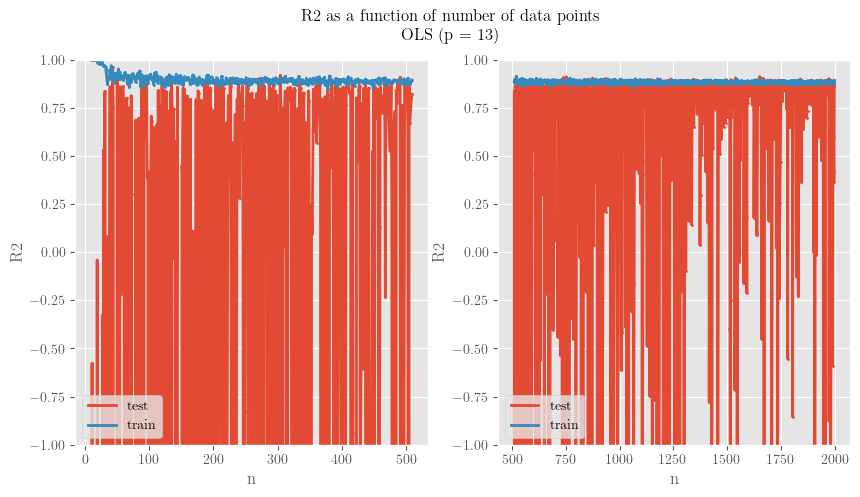

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_ylim(-1, 1)
ax[1].set_ylim(-1, 1)

ax[0].plot(df_OLS_points['n'].iloc[:500], df_OLS_points['R2_test'].iloc[:500], marker='o', markersize='1', linewidth='2', label='test')
ax[0].plot(df_OLS_points['n'].iloc[:500], df_OLS_points['R2_train'].iloc[:500], marker='o', markersize='1', linewidth='2', label='train')

ax[1].plot(df_OLS_points['n'].iloc[500:], df_OLS_points['R2_test'].iloc[500:], marker='o', markersize='1', linewidth='2', label='test')
ax[1].plot(df_OLS_points['n'].iloc[500:], df_OLS_points['R2_train'].iloc[500:], marker='o', markersize='1', linewidth='2', label='train')

fig.suptitle(f'R2 as a function of number of data points \n OLS (p = {p})')

for axs in ax.flatten():
    axs.legend()
    axs.set_ylabel('R2')
    axs.set_xlabel('n')

# b) Ridge regression
* Using Ridge regression to predict the Runge function.
* Method is applied for different polynomial degrees (`p_vals`), and for different values of the penalization parameter $\lambda$.
* Assessing model perfomance with MSE and R^2.

In [36]:
n = 2000  # samples
lamb = 0.01  # regularization term
p_vals = np.arange(2, 16)  # range of polynomial degrees

In [37]:
df_Ridge_degs = Ridge_various_poly_deg(n, lamb, p_vals)  # dataframe w results

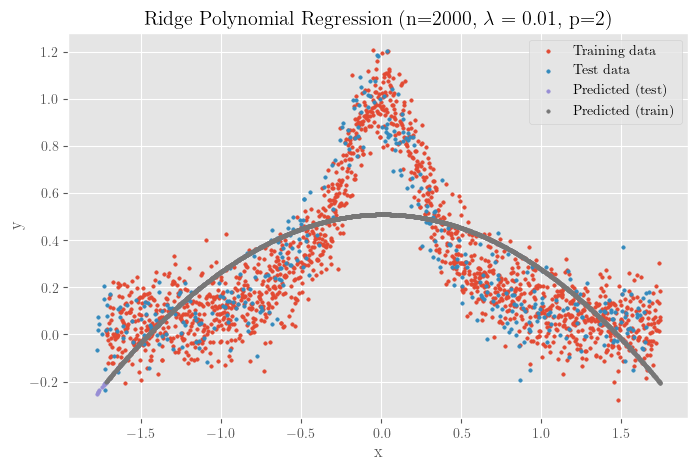

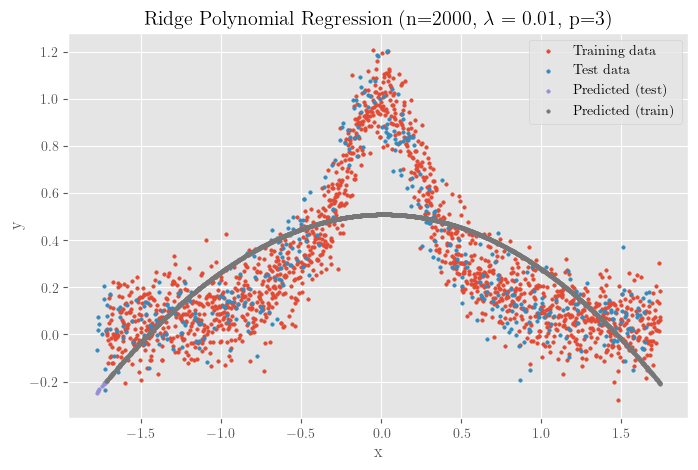

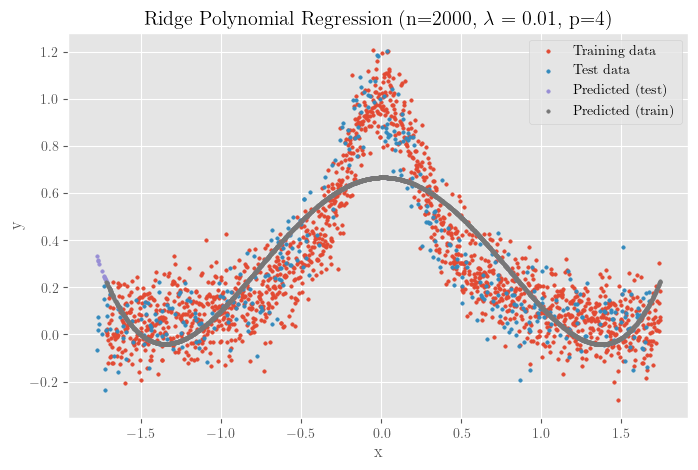

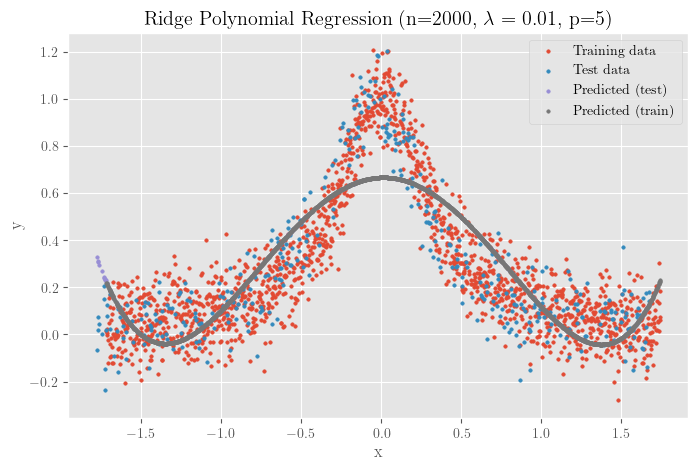

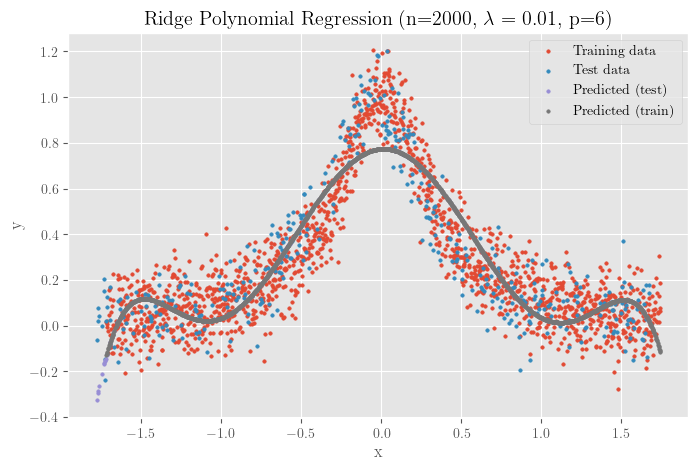

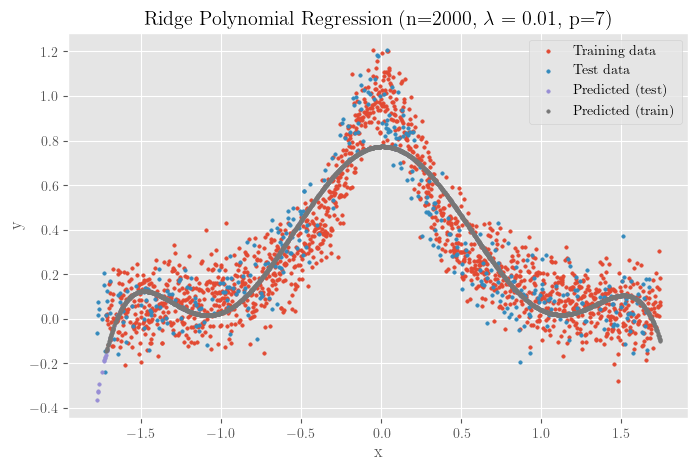

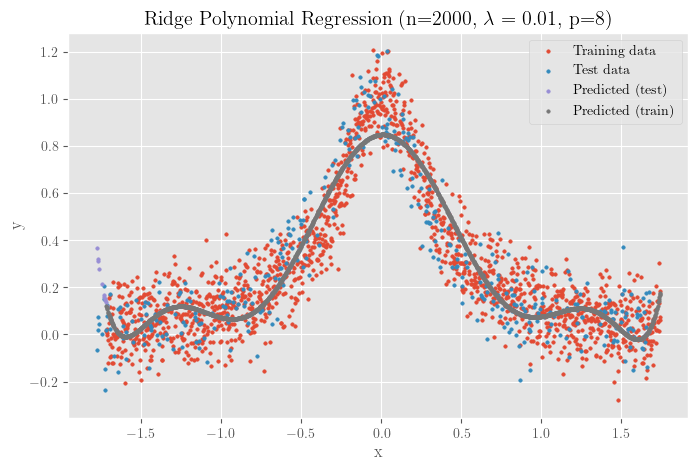

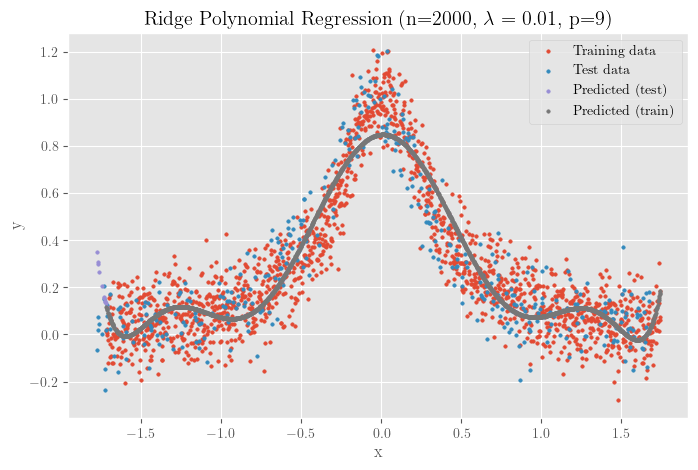

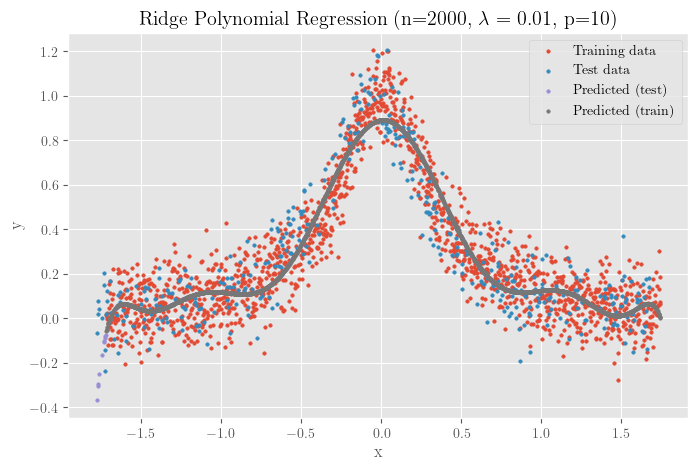

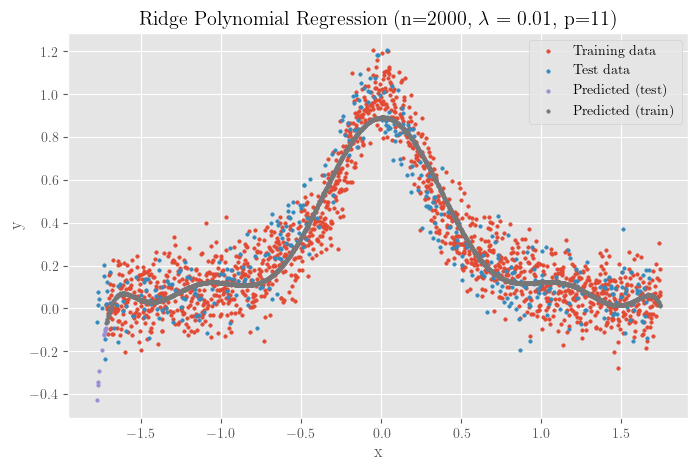

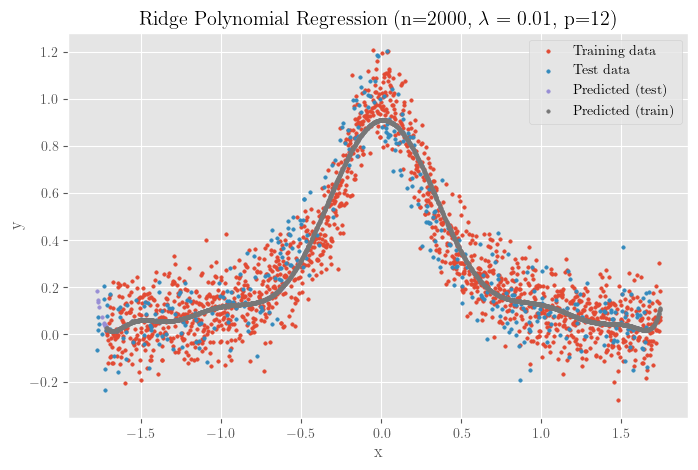

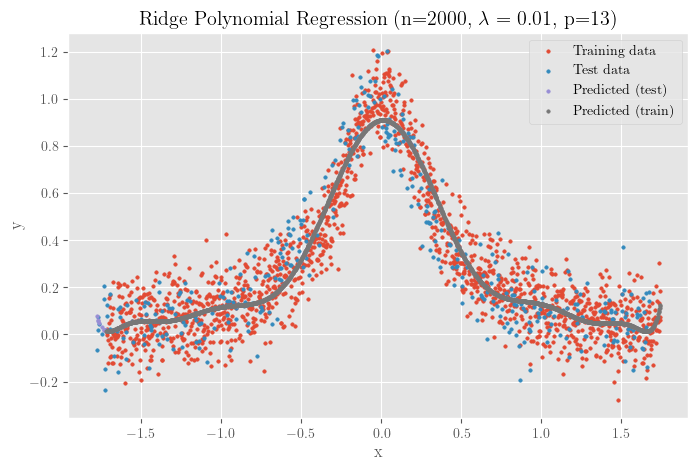

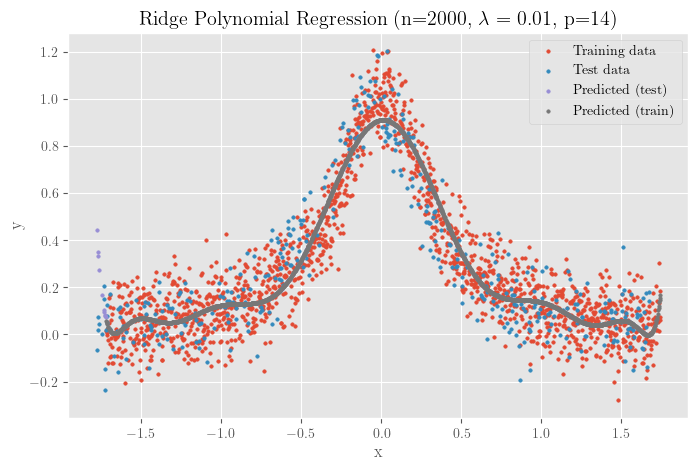

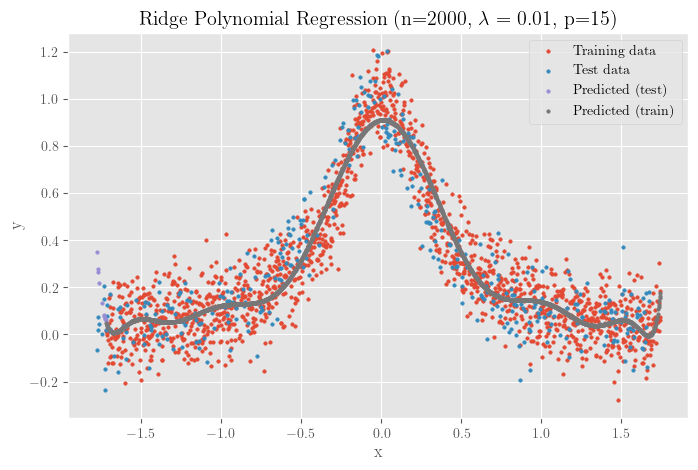

In [38]:
for p in p_vals:    
    plot_Ridge_results(df_Ridge_degs, p, n, lamb)

Text(0.5, 0.98, 'Ridge (n=2000, $\\lambda$=0.01)')

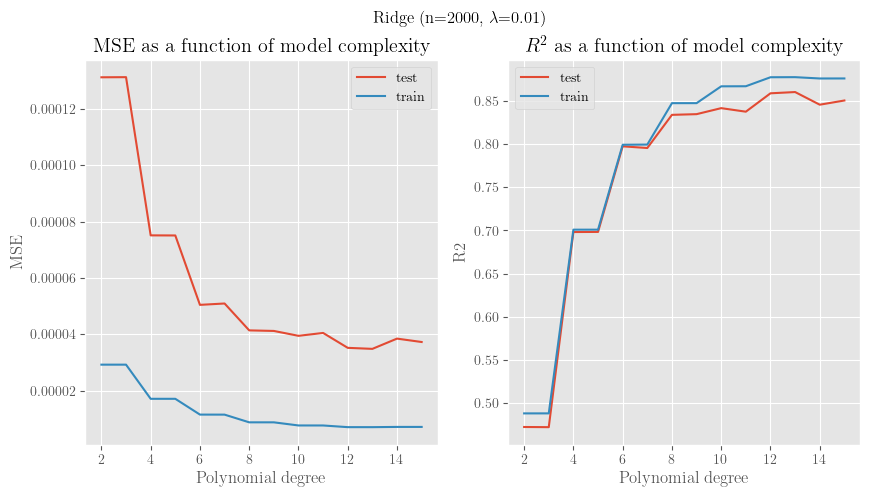

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_test'], label='test')
ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_train'], label='train')

ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_test'], label='test')
ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_train'], label='train')

ax[0].set_ylabel('MSE')
ax[1].set_ylabel('R2')

ax[0].set_title('MSE as a function of model complexity')
ax[1].set_title(r'$R^2$ as a function of model complexity')

for axs in ax:
    axs.legend()
    axs.set_xlabel('Polynomial degree')

fig.suptitle(rf'Ridge (n={n}, $\lambda$={lamb})')

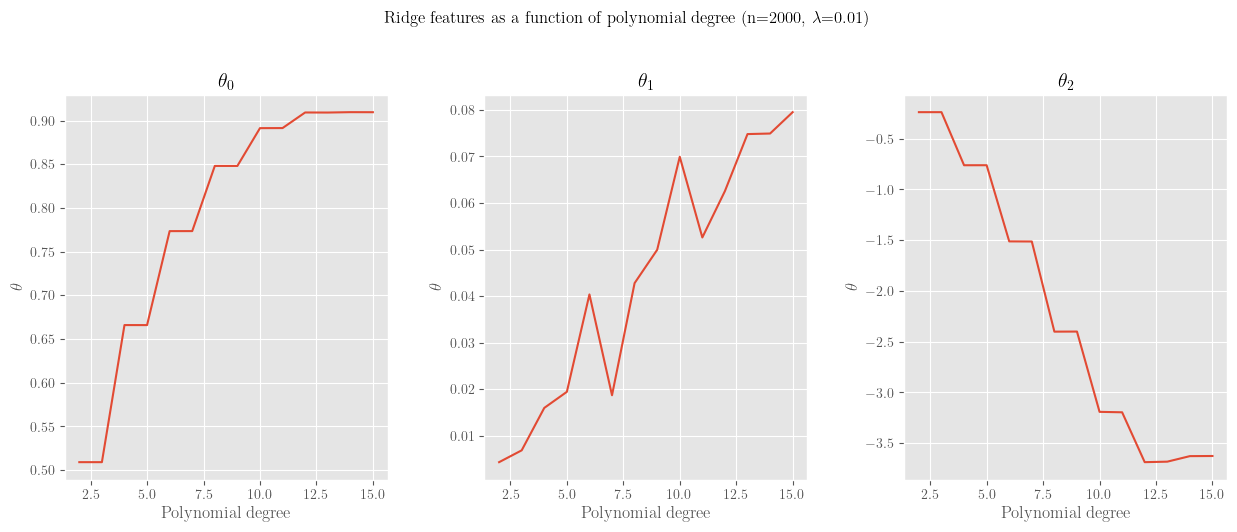

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)

ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['theta'].apply(lambda x: x[0]))
ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['theta'].apply(lambda x: x[1]))
ax[2].plot(df_Ridge_degs['p'], df_Ridge_degs['theta'].apply(lambda x: x[2]))

ax[0].set_title(r'$\theta_0$')
ax[1].set_title(r'$\theta_1$')
ax[2].set_title(r'$\theta_2$')

fig.suptitle(rf'Ridge features as a function of polynomial degree (n={n}, $\lambda$={lamb})', y=1.05)

for axs in ax:
    axs.set_xlabel('Polynomial degree')
    axs.set_ylabel(r'$\theta$')

In [41]:
n = 2000
p = 13
lambs = np.logspace(-10, 1, 15)

In [42]:
df_Ridge_lambs = Ridge_various_lambs(n, p, lambs)

Text(0.5, 1.05, 'Ridge (n=2000, p=13)')

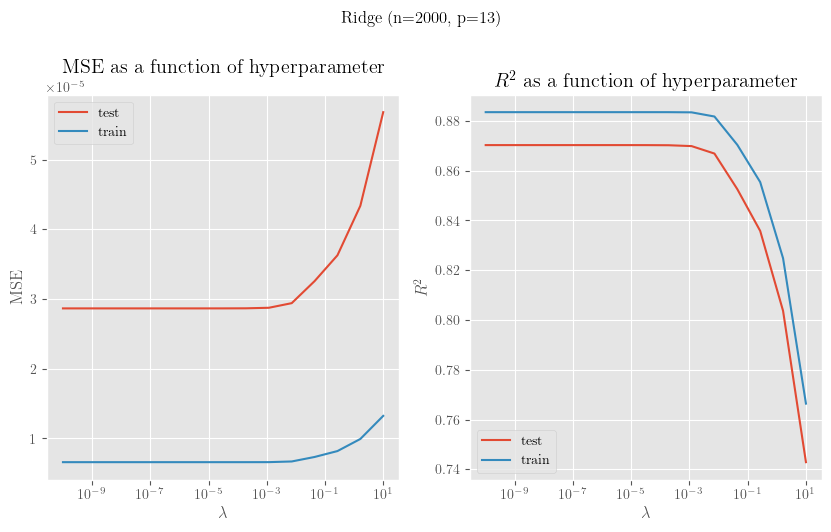

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_xscale('log')
ax[1].set_xscale('log')

ax[0].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['MSE_test'], label='test')
ax[0].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['MSE_train'], label='train')

ax[1].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['R2_test'], label='test')
ax[1].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['R2_train'], label='train')

ax[0].set_ylabel('MSE')
ax[1].set_ylabel(r'$R^2$')

ax[0].set_title('MSE as a function of hyperparameter')
ax[1].set_title(r'$R^2$ as a function of hyperparameter')

for axs in ax:
    axs.legend()
    axs.set_xlabel(r'$\lambda$')

fig.suptitle(f'Ridge (n={n}, p={p})', y=1.05)

In [54]:
len(df_Ridge_lambs['theta'][0])

14

In [57]:
# Plot alle theta

Text(0.5, 1.0, '$\\theta_2$')

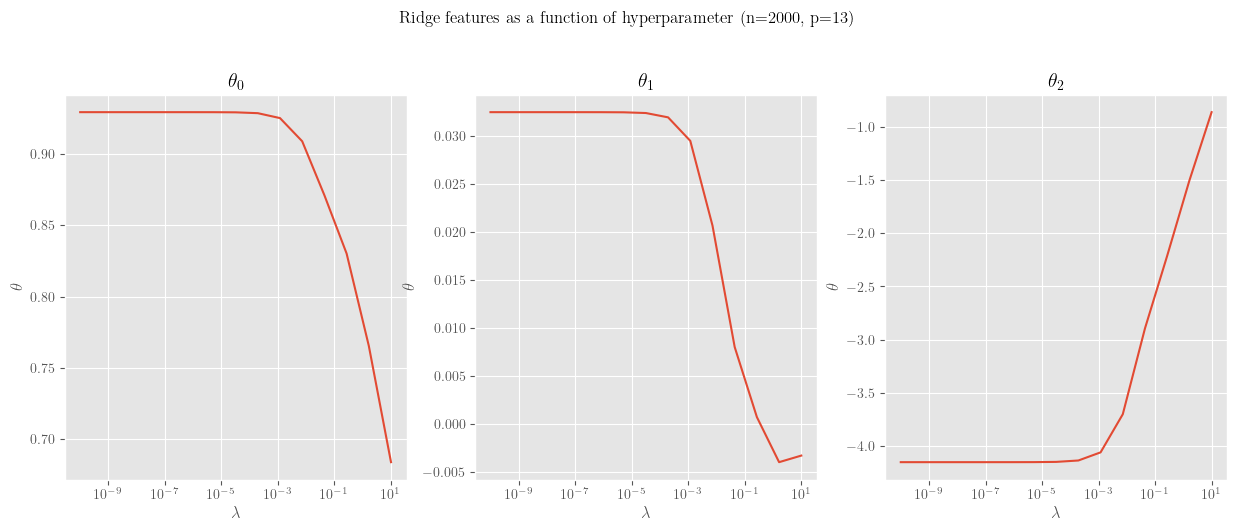

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['theta'].apply(lambda x: x[0]))
ax[1].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['theta'].apply(lambda x: x[1]))
ax[2].plot(df_Ridge_lambs['lambda'], df_Ridge_lambs['theta'].apply(lambda x: x[2]))

fig.suptitle(f'Ridge features as a function of hyperparameter (n={n}, p={p})', y=1.05)

for axs in ax:
    axs.set_xscale('log')
    axs.set_xlabel(r'$\lambda$')
    axs.set_ylabel(r'$\theta$')

ax[0].set_title(r'$\theta_0$')
ax[1].set_title(r'$\theta_1$')
ax[2].set_title(r'$\theta_2$')

# Comparing OLS and Ridge

Text(0.5, 0.98, 'OLS and Ridge \\\\n = 2000, $\\lambda$=1.00e-02')

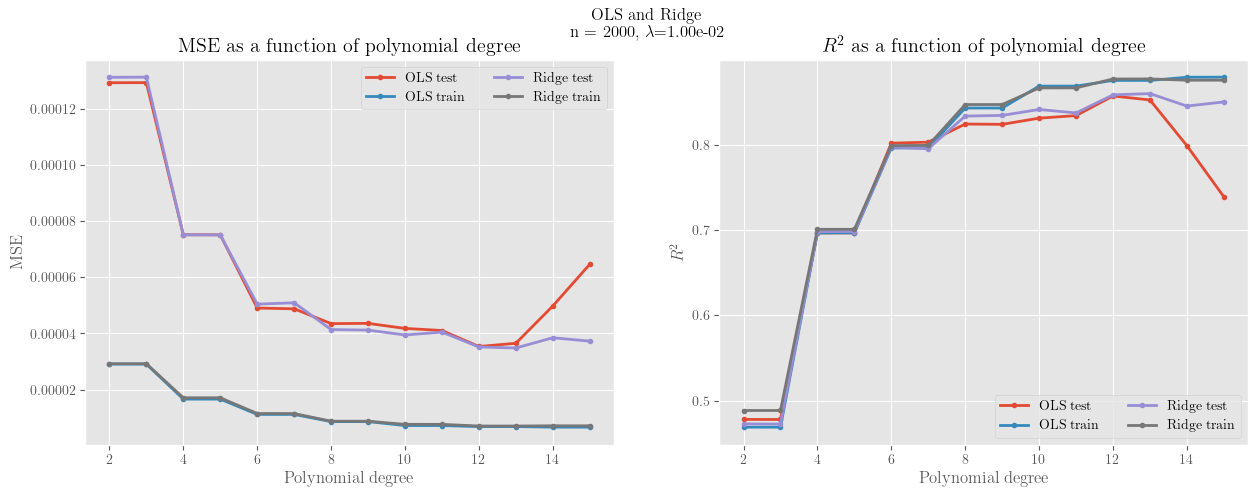

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_test'], marker='o', markersize='3', linewidth='2', label='OLS test')
ax[0].plot(df_OLS_degs['p'], df_OLS_degs['MSE_train'], marker='o', markersize='3', linewidth='2', label='OLS train')

ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_test'], marker='o', markersize='3', linewidth='2', label='Ridge test')
ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['MSE_train'], marker='o', markersize='3', linewidth='2', label='Ridge train')


ax[0].set_title('MSE as a function of polynomial degree')
ax[0].legend(loc='upper right', ncol=2)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_test'], marker='o', markersize='3', linewidth='2', label=f'OLS test')
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['R2_train'], marker='o', markersize='3', linewidth='2', label=f'OLS train')

ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_test'], marker='o', markersize='3', linewidth='2', label=f'Ridge test')
ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['R2_train'], marker='o', markersize='3', linewidth='2', label=f'Ridge train')

ax[1].set_title(r'$R^2$ as a function of polynomial degree')
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(rf'OLS and Ridge \\n = {n}, $\lambda$={lamb:.2e}')

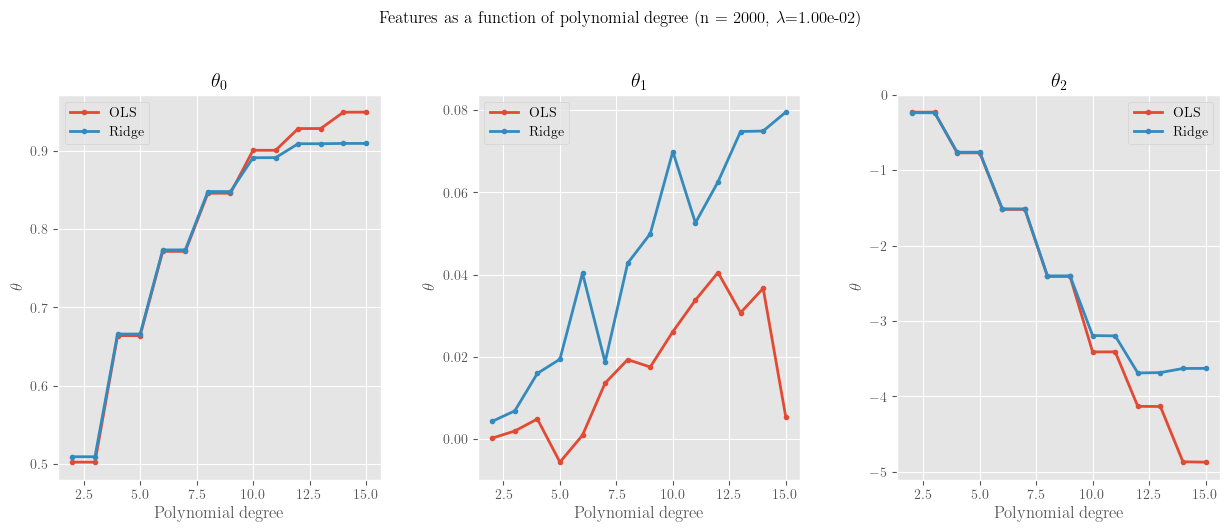

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
plt.subplots_adjust(wspace=0.3)

ax[0].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[0]), marker='o', markersize='3', linewidth='2', label='OLS')
ax[1].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[1]), marker='o', markersize='3', linewidth='2', label='OLS')
ax[2].plot(df_OLS_degs['p'], df_OLS_degs['theta'].apply(lambda x: x[2]), marker='o', markersize='3', linewidth='2', label='OLS')


ax[0].plot(df_Ridge_degs['p'], df_Ridge_degs['theta'].apply(lambda x: x[0]), marker='o', markersize='3', linewidth='2', label='Ridge')
ax[1].plot(df_Ridge_degs['p'], df_Ridge_degs['theta'].apply(lambda x: x[1]), marker='o', markersize='3', linewidth='2', label='Ridge')
ax[2].plot(df_Ridge_degs['p'], df_Ridge_degs['theta'].apply(lambda x: x[2]), marker='o', markersize='3', linewidth='2', label='Ridge')

ax[0].set_title(r'$\theta_0$')
ax[1].set_title(r'$\theta_1$')
ax[2].set_title(r'$\theta_2$')

fig.suptitle(rf'Features as a function of polynomial degree (n = {n}, $\lambda$={lamb:.2e})', y=1.05)

for axs in ax:
    axs.set_xlabel('Polynomial degree')
    axs.set_ylabel(r'$\theta$')
    axs.legend()

In [61]:
for i in df_Ridge_degs['theta']:
    print(i)

[ 0.50911619  0.00431541 -0.23782984]
[ 0.50910738  0.00685638 -0.23779895 -0.00142099]
[ 0.66595762  0.0159716  -0.7610328  -0.00889979  0.20491783]
[ 0.66592814  0.01942812 -0.76086108 -0.01427552  0.20483024  0.00162001]
[ 0.77344841  0.04035854 -1.51156784 -0.05651721  0.95518298  0.01687115
 -0.1838345 ]
[ 0.77347627  0.0186936  -1.51273609  0.00867797  0.95711621 -0.03106306
 -0.18447432  0.00992062]
[ 0.84804341  0.04278757 -2.40139036 -0.06785984  2.58495943  0.03249073
 -1.12629595 -0.00511389  0.16855971]
[ 0.84803156  0.04995092 -2.40053527 -0.10306203  2.58278095  0.07837085
 -1.12476466 -0.02702003  0.1682404   0.00345797]
[ 0.89126376  0.06994289 -3.19201824 -0.20765267  4.88032226  0.23447619
 -3.4321415  -0.11146082  1.10596976  0.0183744  -0.13249128]
[ 0.8913537   0.05260031 -3.19643406 -0.07965049  4.89596636 -0.02497043
 -3.45027282  0.10067458  1.1142607  -0.05688108 -0.13378914  0.00964623]
[ 9.09190510e-01  6.25687076e-02 -3.68796872e+00 -1.70396756e-01
  7.02592